--2021-08-02 13:22:33--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322 [text/plain]
Saving to: ‘grades.csv.7’

grades.csv.7        100%[===================>]     322  --.-KB/s    in 0s      

2021-08-02 13:22:34 (14.6 MB/s) - ‘grades.csv.7’ saved [322/322]

Minimum:3.00
Mean:49.18
Median:49.50
Mode:50.00
Maximum:97.00



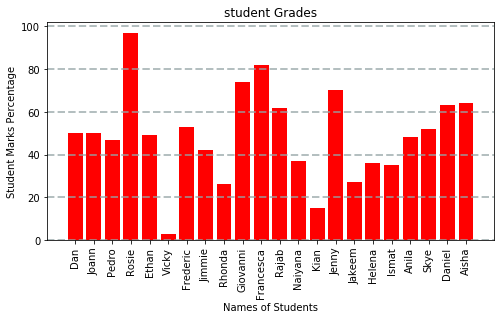

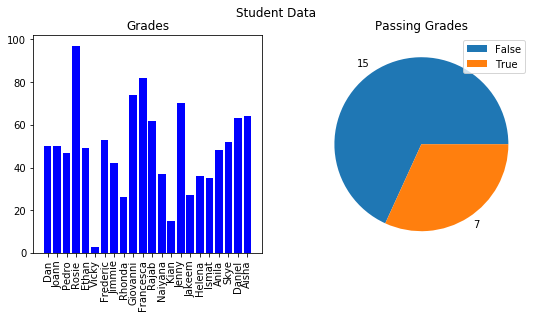

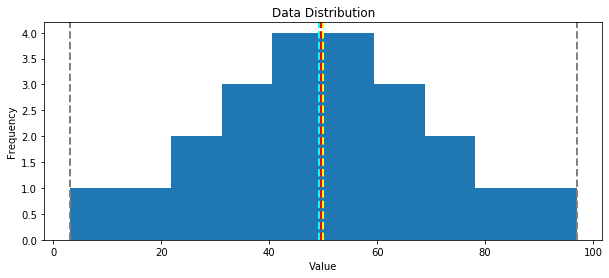

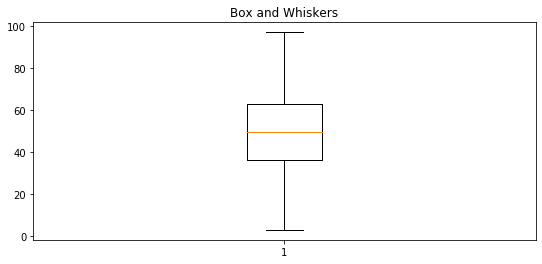

In [8]:
 import pandas as pd
#first we import our data from a csv file on the web
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/grades.csv
 
students = pd.read_csv('grades.csv',delimiter=',',header='infer')
#print our data
students
#remove rows with empty column entries
students=students.dropna(axis=0,how='any')
#print data
students 
#create a series and see which students passes with atleast a 60%
student_passes=pd.Series(students['Grade']>=60)
#print data
student_passes

#add everyone who passed to a new column on your data frameand name it
students=pd.concat([students,student_passes.rename('Student Passes')],axis=1)
students

# Ensure plots are displayed inline in the notebook
%matplotlib inline

from matplotlib import pyplot as plt
#create a figure
fig=plt.figure(figsize=(8,4))
#create a barplot of name vs grade
plt.bar(x=students.Name,height=students.Grade,color='red')
#customize the chart
plt.title('student Grades')
plt.ylabel('Student Marks Percentage')
plt.xlabel('Names of Students')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
#plt.show()

#new figure with two subplots (1 row, 2 columns)
fig,ax=plt.subplots(1,2,figsize=(9,4))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=students.Name,height=students.Grade,color='blue')
ax[0].set_title('Grades')
ax[0].set_xticklabels(students.Name,rotation=90)
# Create a pie chart of pass counts on the second axis
pass_counts=students['Student Passes'].value_counts()
ax[1].pie(pass_counts,labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())
#add a main title to the figure
fig.suptitle('Student Data')
fig.show()

#back to using data frames methods

# Get the variable to examine
var_data= students['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
median_val = var.median()
mode_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        median_val,
                                                                                        mode_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var_data)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=median_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=mode_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
fig.show()


fig=plt.figure(figsize=(9,4))

plt.boxplot(var_data)
plt.title('Box and Whiskers')

fig.show()
